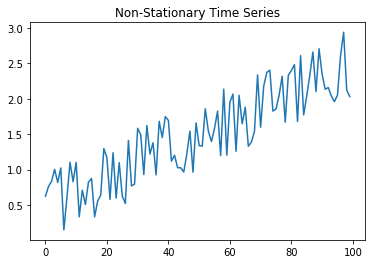

In [1]:
import matplotlib.pyplot as plt
import random
random.seed(5)

non_stationary_series = []
for i in range(0,100):
    non_stationary_series.append(random.random()+(i*.02))
    
plt.plot(non_stationary_series)
plt.title('Non-Stationary Time Series')
plt.show()

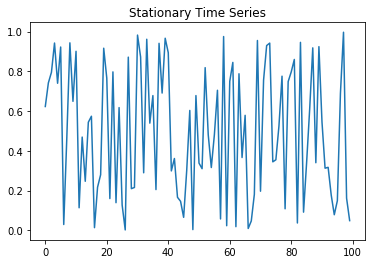

In [2]:
import matplotlib.pyplot as plt
import random
random.seed(5)

stationary_series = []
for i in range(0,100):
    stationary_series.append(random.random())
    
plt.plot(stationary_series)
plt.title('Stationary Time Series')
plt.show()

<h2>ADF Test</h2>

In [11]:
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def ADF_Stationarity_Test(timeseries, window=30, plot = True):

    timeseries = pd.Series(timeseries)
    
    #plotting
    if plot:
        rolling_mean = pd.rolling_mean(timeseries, window=window)
        rolling_std = pd.rolling_std(timeseries, window=window)
        
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolling_mean, color='black', label='Rolling Mean')
        std = plt.plot(rolling_std, color='red', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
    
    #Dickey-Fuller test:
    print('Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    #Add Critical Values
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    #Print Results
    print(dfoutput)

In [48]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):

        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value

            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [49]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(stationary_series, printResults = False)
sTest.isStationary

True

In [50]:
sTest.ADF_Stationarity_Test(stationary_series)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.045848e+01
P-Value                 1.378722e-18
# Lags Used             0.000000e+00
# Observations Used     9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64


In [13]:
timeseries = pd.Series(stationary_series)
dftest = adfuller(timeseries, autolag='AIC')

In [14]:
dftest

(-10.458478272286243,
 1.378721737485902e-18,
 0,
 99,
 {'1%': -3.498198082189098,
  '10%': -2.5825959973472097,
  '5%': -2.891208211860468},
 54.135053305361936)

In [15]:
print(type(dftest))

<class 'tuple'>


In [18]:
for i in dftest[0:2]:
    print(i)

-10.458478272286243
1.378721737485902e-18
